In [1]:
from ucimlrepo import fetch_ucirepo 
import numpy as np
import pandas as pd
  
wholesale_customers = fetch_ucirepo(id=292) 
  
X = wholesale_customers.data.features 
y = wholesale_customers.data.targets 
  
df = pd.DataFrame(wholesale_customers.data.original, columns=wholesale_customers.headers)
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


**TASK: Create a scatterplot showing the relation between MILK and GROCERY spending, colored by Channel column.**

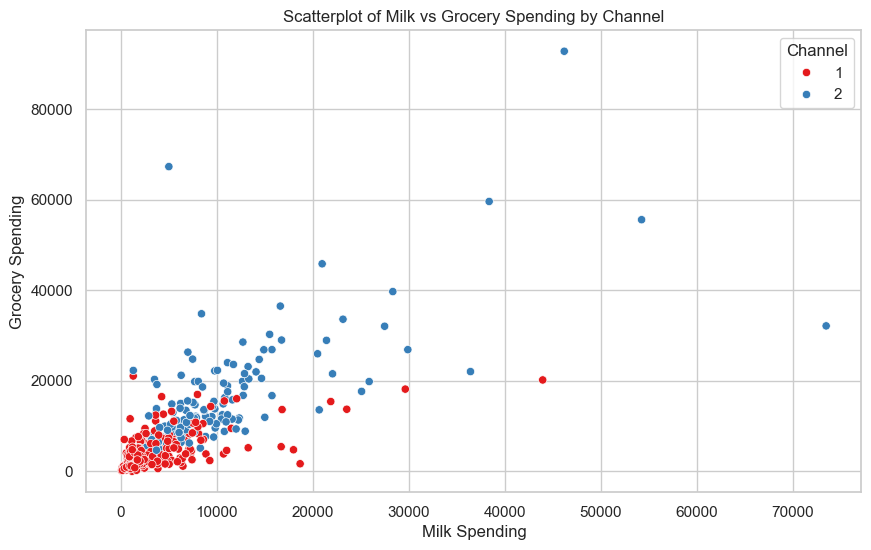

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Create scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Milk', y='Grocery', hue='Channel', data=df, palette='Set1')
plt.title('Scatterplot of Milk vs Grocery Spending by Channel')
plt.xlabel('Milk Spending')
plt.ylabel('Grocery Spending')
plt.legend(title='Channel', loc='upper right')
plt.show()


**TASK: Use seaborn to create a histogram of MILK spending, colored by Channel. Can you figure out how to use seaborn to "stack" the channels, instead of have them overlap?**

C:\Users\User\AppData\Local\Temp\ipykernel_21632\1471941745.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Channel', loc='upper right')


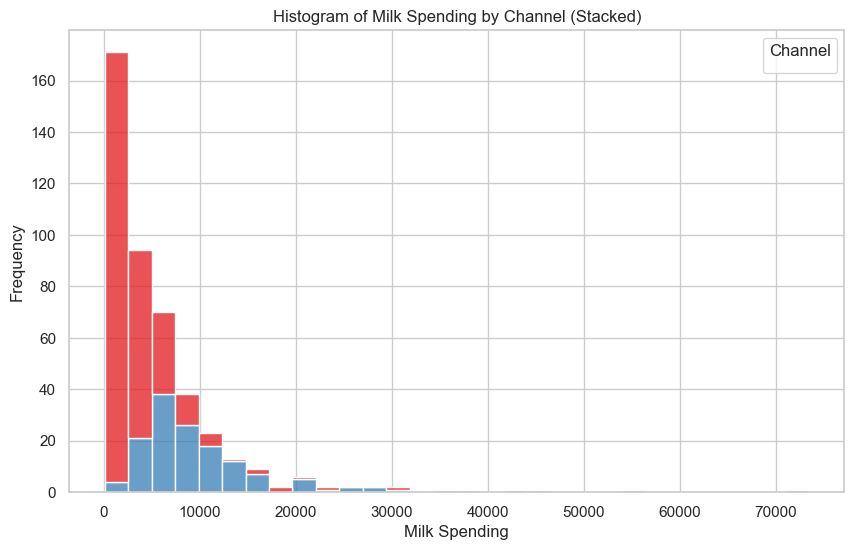

In [3]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Milk', hue='Channel', multiple='stack', palette='Set1', bins=30)
plt.title('Histogram of Milk Spending by Channel (Stacked)')
plt.xlabel('Milk Spending')
plt.ylabel('Frequency')
plt.legend(title='Channel', loc='upper right')
plt.show()

**TASK: Create an annotated clustermap of the correlations between spending on different cateogires.**<br>
**
TASK: Create a PairPlot of the dataframe, colored by Regio**n.

<Figure size 1000x800 with 0 Axes>

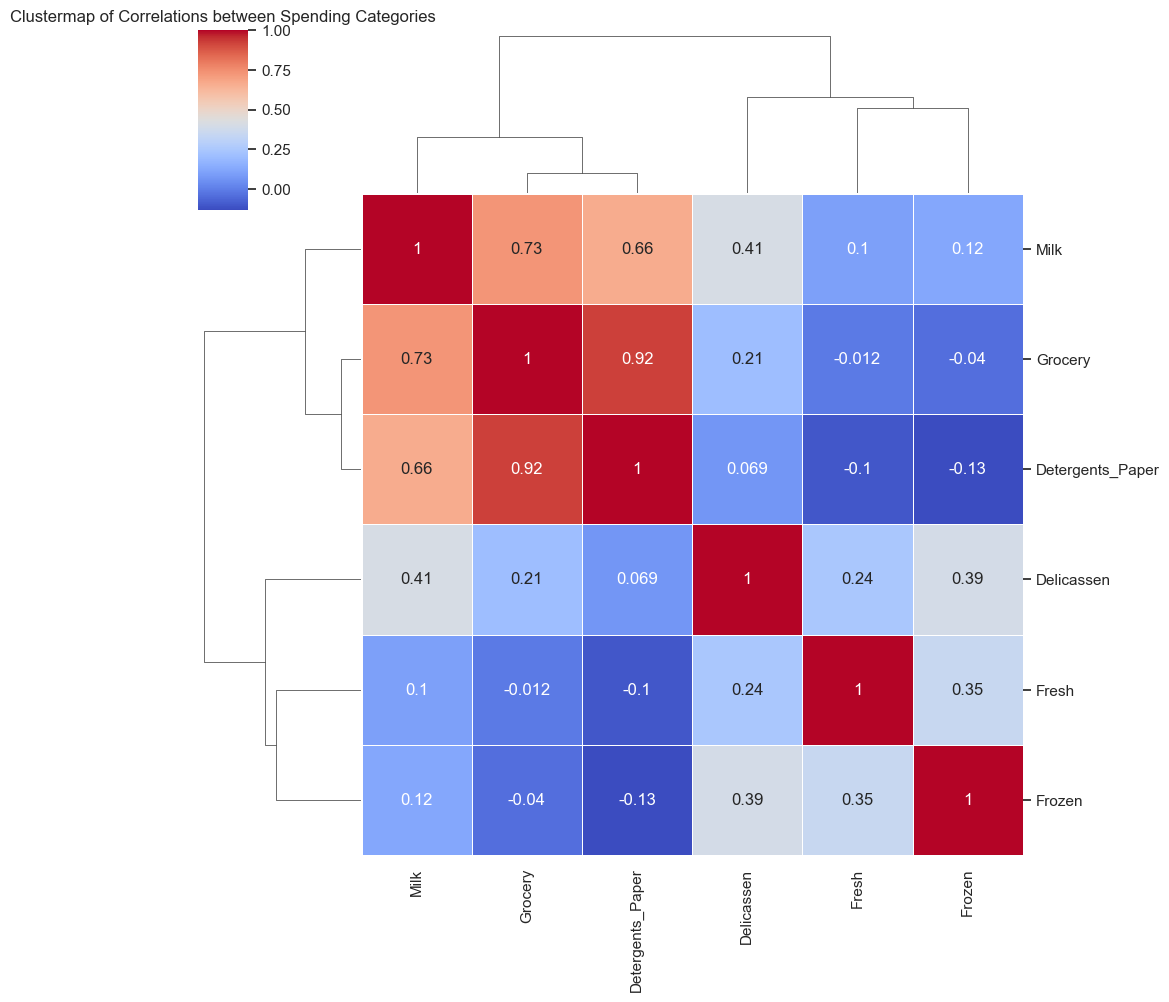

In [4]:
# Calculate the correlation matrix
corr_matrix = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].corr()

# Create the annotated clustermap
plt.figure(figsize=(10, 8))
sns.clustermap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Clustermap of Correlations between Spending Categories')
plt.show()


**TASK: Since the values of the features are in different orders of magnitude, let's scale the data. Use StandardScaler to scale the data.**

**TASK: Use DBSCAN and a for loop to create a variety of models testing different epsilon values. Set min_samples equal to 2 times the number of features. During the loop, keep track of and log the percentage of points that are outliers. For reference the solutions notebooks uses the following range of epsilon values for testing:**

    np.linspace(0.001,3,50)

**TASK: Create a line plot of the percentage of outlier points versus the epsilon value choice.**

<Figure size 1200x800 with 0 Axes>

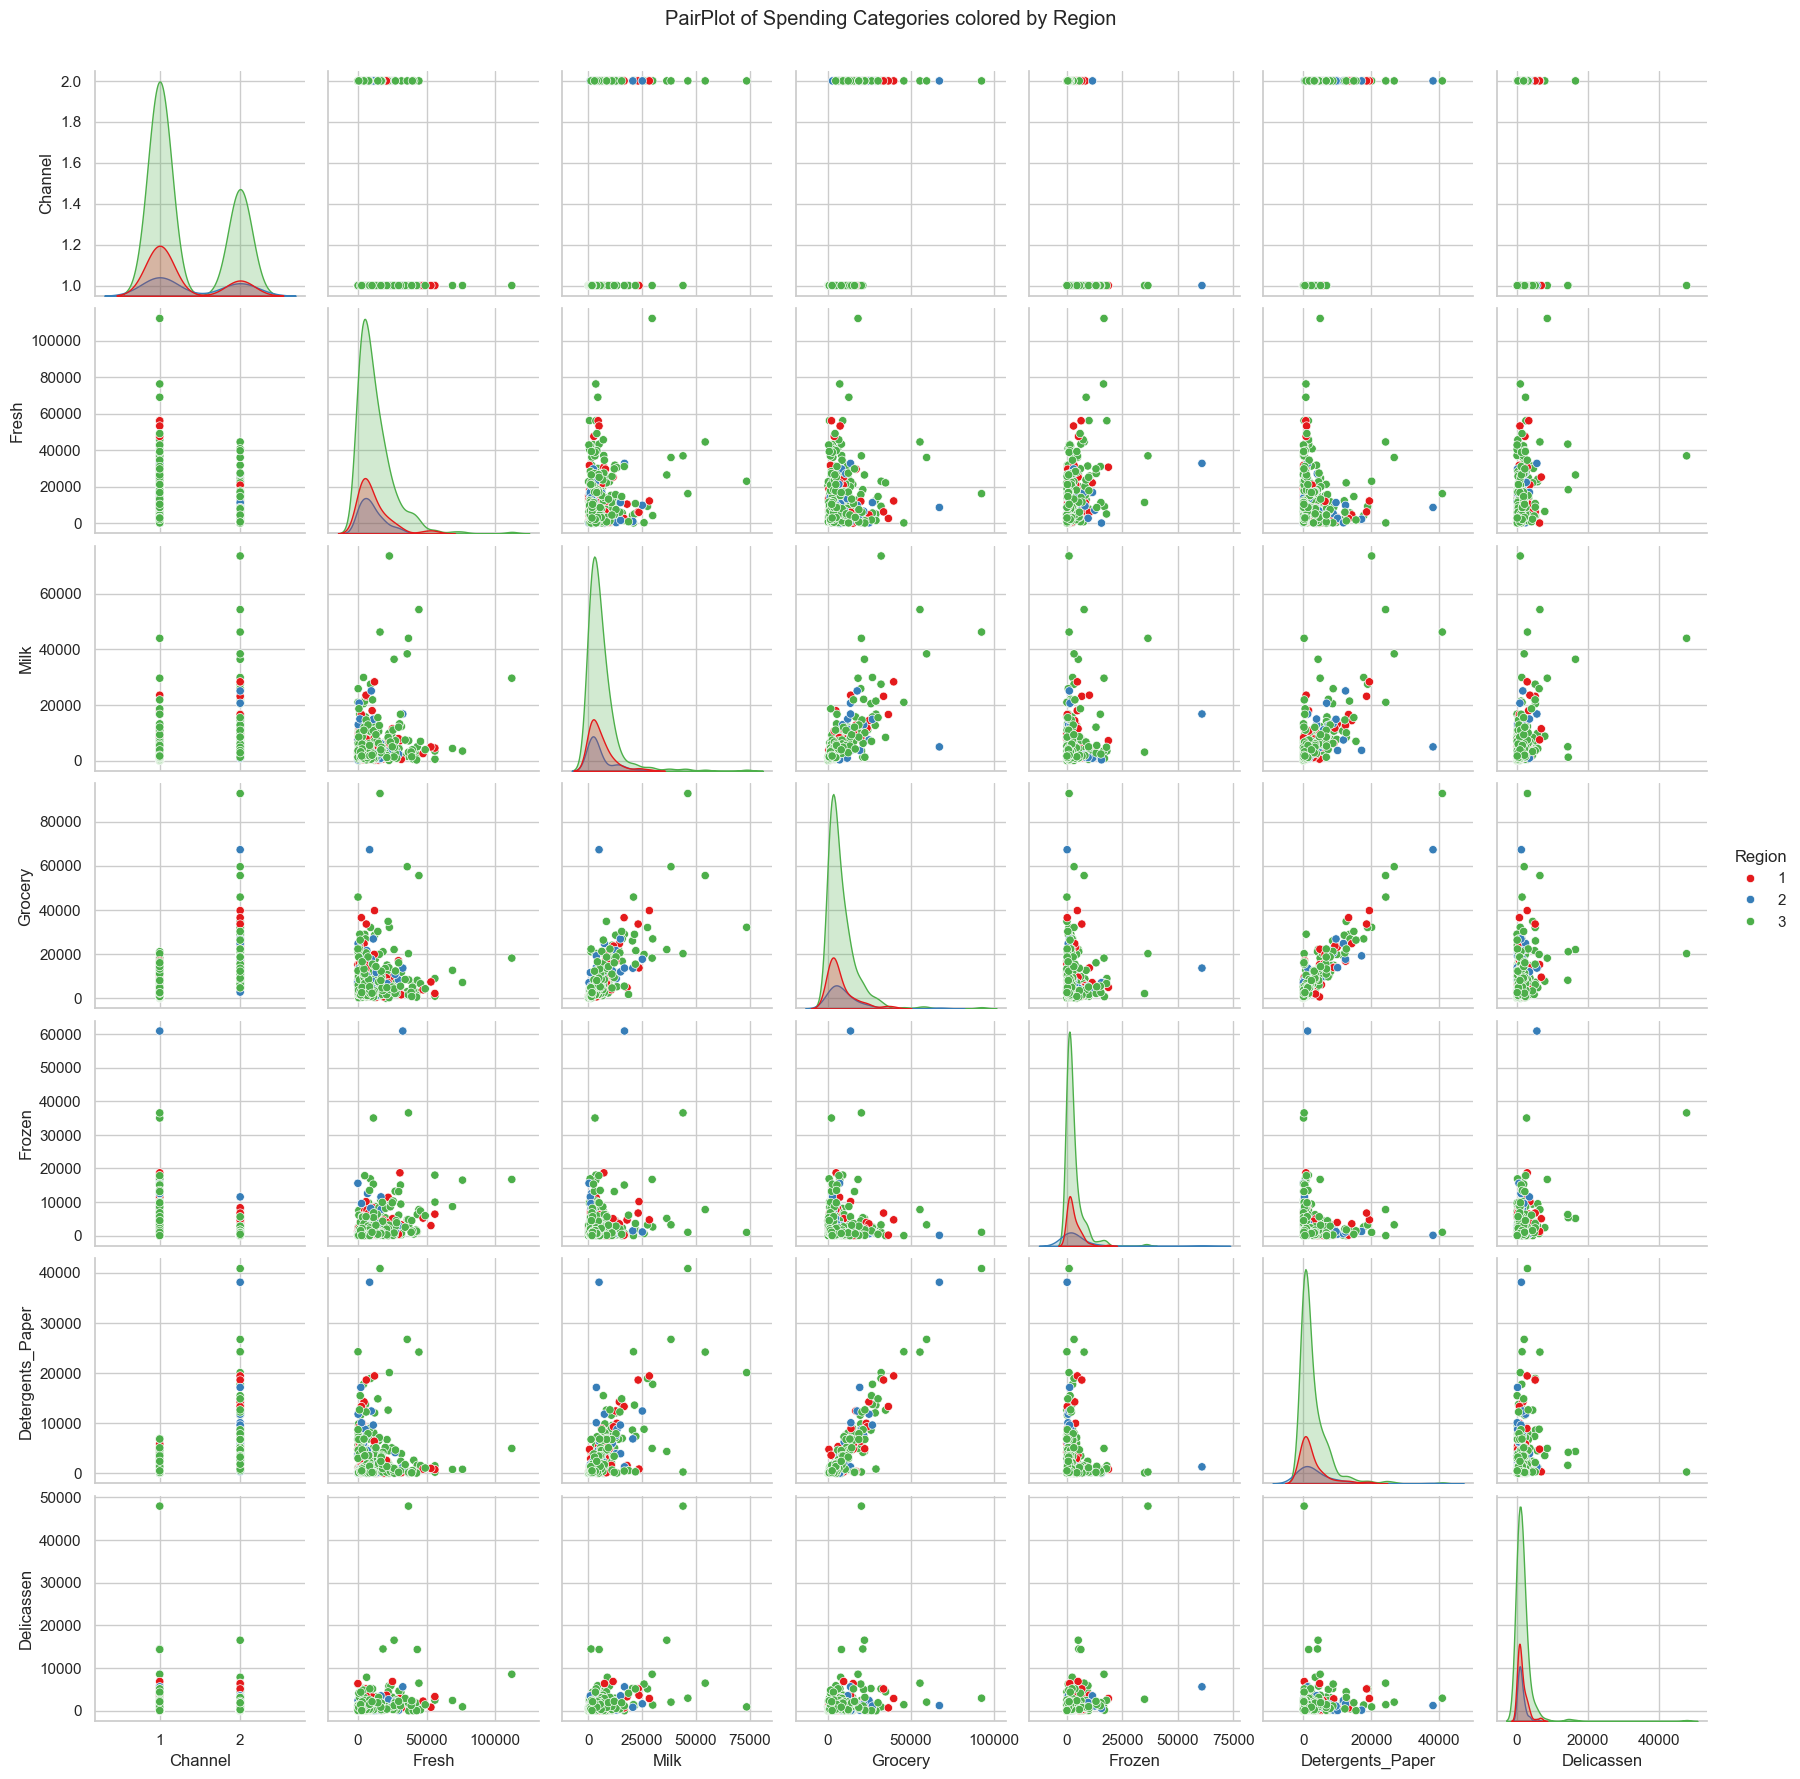

In [5]:
# Create PairPlot colored by Region
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='Region', palette='Set1')
plt.suptitle('PairPlot of Spending Categories colored by Region', y=1.02)
plt.show()


**TASK: Based on the plot created in the previous task, retrain a DBSCAN model with a reasonable epsilon value. Note: For reference, the solutions use eps=2.**

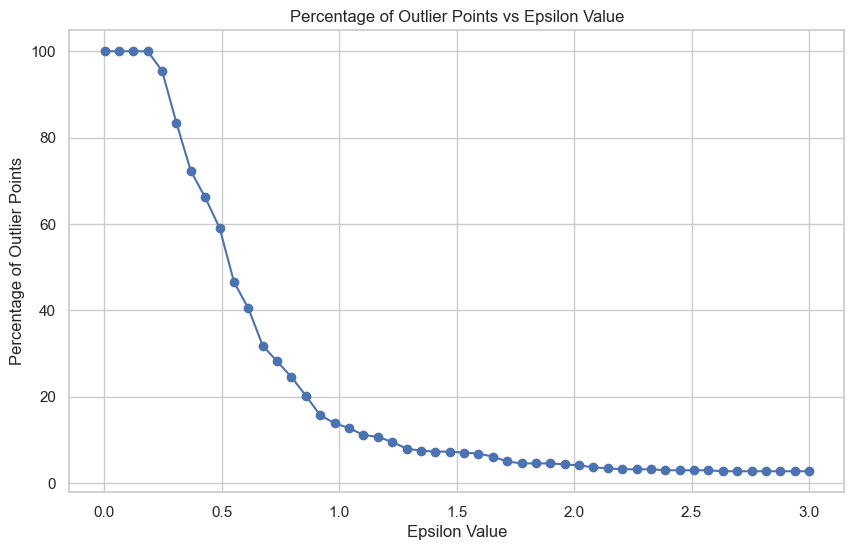

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']])

# Initialize variables to store percentage of outliers
outlier_percentages = []

# Define range of epsilon values for testing
epsilon_values = np.linspace(0.001, 3, 50)

# Set min_samples equal to 2 times the number of features
min_samples = 2 * X_scaled.shape[1]

# Loop through different epsilon values
for epsilon in epsilon_values:
    # Create DBSCAN model
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
    
    # Fit model and calculate labels
    dbscan.fit(X_scaled)
    
    # Calculate percentage of outliers
    outlier_percentage = np.sum(dbscan.labels_ == -1) / len(dbscan.labels_) * 100
    outlier_percentages.append(outlier_percentage)

# Create line plot of percentage of outlier points versus epsilon value
plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, outlier_percentages, marker='o')
plt.title('Percentage of Outlier Points vs Epsilon Value')
plt.xlabel('Epsilon Value')
plt.ylabel('Percentage of Outlier Points')
plt.grid(True)
plt.show()


**TASK: Create a scatterplot of Milk vs Grocery, colored by the discovered labels of the DBSCAN model.**

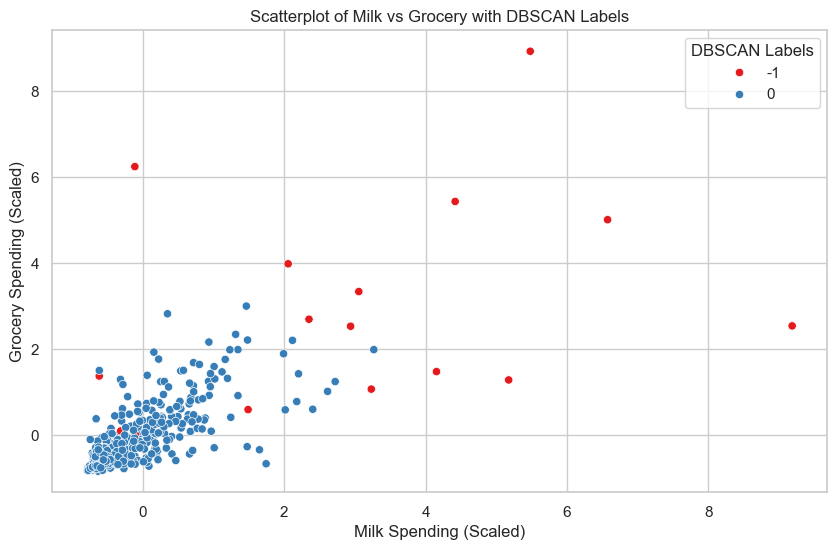

In [7]:
# Retrain DBSCAN model with epsilon value of 2
dbscan = DBSCAN(eps=2, min_samples=min_samples)
dbscan.fit(X_scaled)

# Create scatterplot of Milk vs Grocery, colored by DBSCAN labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 1], y=X_scaled[:, 2], hue=dbscan.labels_, palette='Set1')
plt.title('Scatterplot of Milk vs Grocery with DBSCAN Labels')
plt.xlabel('Milk Spending (Scaled)')
plt.ylabel('Grocery Spending (Scaled)')
plt.legend(title='DBSCAN Labels', loc='upper right')
plt.show()


**TASK: Create a scatterplot of Milk vs. Detergents Paper colored by the labels.**

**TASK: Create a new column on the original dataframe called "Labels" consisting of the DBSCAN labels.**

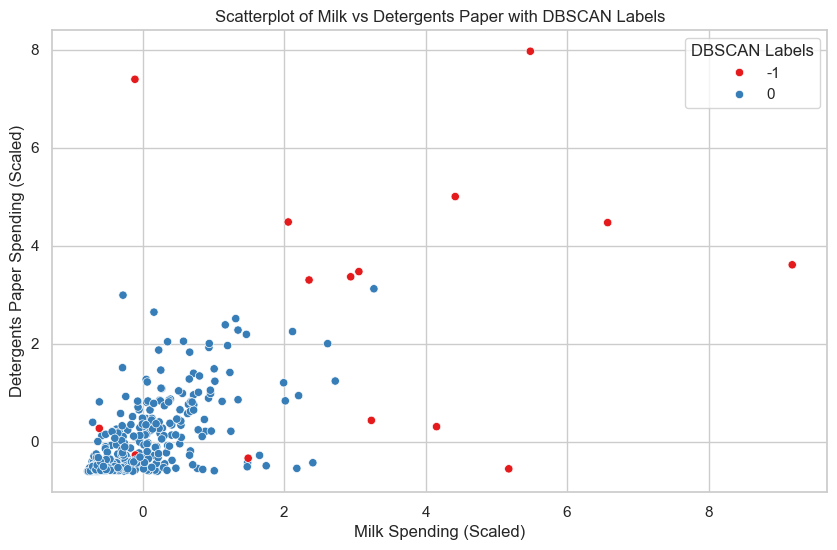

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 1], y=X_scaled[:, 4], hue=dbscan.labels_, palette='Set1')
plt.title('Scatterplot of Milk vs Detergents Paper with DBSCAN Labels')
plt.xlabel('Milk Spending (Scaled)')
plt.ylabel('Detergents Paper Spending (Scaled)')
plt.legend(title='DBSCAN Labels', loc='upper right')
plt.show()

df['Labels'] = dbscan.labels_


**TASK: Compare the statistical mean of the clusters and outliers for the spending amounts on the categories.**


In [9]:
mean_spending = df.groupby('Labels')[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].mean()

outliers_mean = df[df['Labels'] == -1][['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].mean()

print("Mean Spending for Clusters and Outliers:")
print(mean_spending)
print("\nMean Spending for Outliers:")
print(outliers_mean)


Mean Spending for Clusters and Outliers:
               Fresh          Milk       Grocery        Frozen  \
Labels                                                           
-1      31601.555556  25574.166667  32205.277778  12694.000000   
 0      11164.225118   4952.658768   6916.746445   2661.511848   

        Detergents_Paper   Delicassen  
Labels                                 
-1          13882.722222  7869.444444  
 0           2412.246445  1254.248815  

Mean Spending for Outliers:
Fresh               31601.555556
Milk                25574.166667
Grocery             32205.277778
Frozen              12694.000000
Detergents_Paper    13882.722222
Delicassen           7869.444444
dtype: float64


**TASK: Normalize the dataframe from the previous task using MinMaxScaler so the spending means go from 0-1 and create a heatmap of the values.**

**TASK: Create another heatmap similar to the one above, but with the outliers removed**

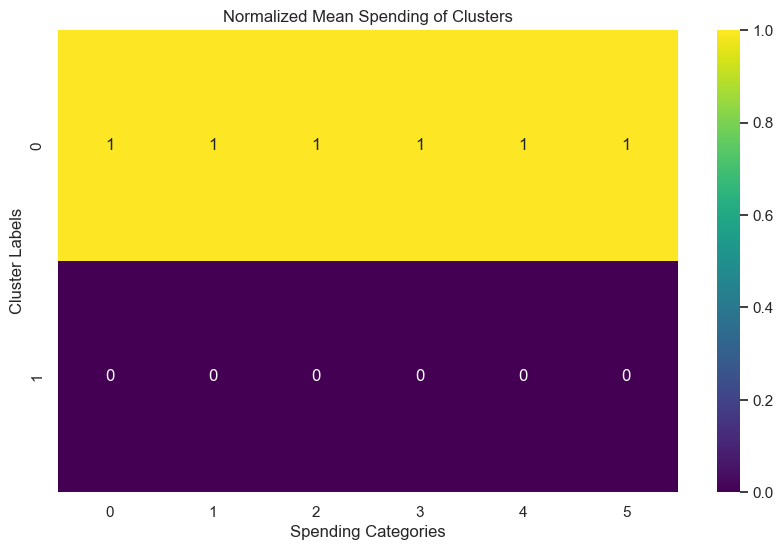

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_df = scaler.fit_transform(mean_spending)

plt.figure(figsize=(10, 6))
sns.heatmap(normalized_df, annot=True, cmap='viridis')
plt.title('Normalized Mean Spending of Clusters')
plt.xlabel('Spending Categories')
plt.ylabel('Cluster Labels')
plt.show()


**TASK: What spending category were the two clusters mode different in?**

In [11]:
cluster_modes = df.groupby('Labels')[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].apply(lambda x: x.mode().iloc[0])

mode_difference = cluster_modes.diff().abs().sum(axis=1).idxmax()
print("The spending category with the most difference in mode between clusters is:", mode_difference)


The spending category with the most difference in mode between clusters is: 0
